## Applications of Singular Value Decomposition
    We are going to follow a top-down approach here and discuss the application first.
    1. SVD is the decomposition of a matrix A into 3 matrices -  U, S and V
    2. S is the diagnol matrices of singular values. Singular values are the important values of different features in the matrix.
    3. The rank of the matrix is a measure of the unique information stored in a matrix. higher the rank, more the information.
    4. Eigenvectors of a matrix are directions of maximum spread or variance of data.
    
    In most of the applications, the basic principle of Dimensionality Reduction is used. We have to reduce a high-rank matrix to a low-rank matrix while preserving important information.


### SVD for Image Compression
    Image compression takes advantage of the fact that only a few of the singular values obtained after SVD are large. You can trim the three matrices based on the first few singular values and obtain a compressed approximation of the original image.

    Here's how you code this in python

In [31]:
import numpy as np
from random import randrange
import os
from PIL import Image
import matplotlib.pyplot as plt

##### Load the Image and convert to grayscale

In [37]:
img = Image.open('about_cover.jpg').convert('L').resize((256,256))

        Color images are represented in python as 3 dimensional numpy arrays — the third dimension to represent the color values (red,green blue). However, svd method is applicable to two dimensional matrices. So we have to find a way to convert the 3 dimensional array to 2 dimensional arrays, apply svd and reconstruct it back as a 3 dimensional array . 

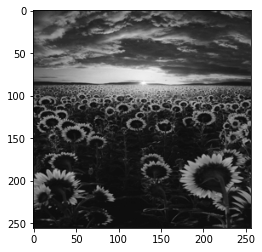

In [38]:
plt.imshow(img, cmap='gray')

### Compute Singular Value Decomposition

In [39]:
U, S, V = np.linalg.svd(np.array(img), full_matrices = False)
S = np.diag(S)

    The Plot below represents the energy of each singular vector adds to the overall image

Text(0.5, 1.0, 'Cumulative Sum of Sigma Matrix')

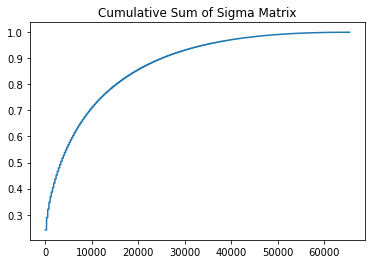

In [40]:
plt.plot(np.cumsum(S)/np.sum(S))
plt.title('Cumulative Sum of Sigma Matrix')

### Image Reconstruction

    The energy in the first I columns can be calculated using the following formula

$$||I|| = \text{trace}[I^T \times I] = \sum_{i=1}^m \sum_{j=1}^{n} I^2 (i,j) = \sum_{i=1}^{n} \sigma_i^2$$

#### First 5 Columns

    Only keeping the first 5 columns of the SVD matrices, truncating the rest and reconstructing the original image

In [41]:
r = 5
reconstruction = U[:,:r] @ S[0:r,:r] @ V[:r,:r] 

In [42]:
energy = 0
for i in range(r):
    energy = energy + S[i][i] * S[i][i]
energy = energy / np.sum(np.square(S))

print("The first "+ str(r) + " columns contained " + str(energy * 100) + " % of the original energy of the image")

The first 5 columns contained 93.14743374853532 % of the original energy of the image


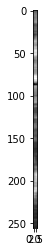

In [43]:
plt.imshow(reconstruction, cmap = 'gray')

### First 10 Columns

In [44]:
r = 10
reconstruction = U[:,:r] @ S[0:r,:r] @ V[:r,:]

In [45]:
energy = 0
for i in range(r):
    energy = energy + S[i][i]*S[i][i]
energy = energy / np.sum(np.square(S))
print('The first ' + str(r) + ' columns contained ' + str(energy * 100) + '% of the original energy of the image')

The first 10 columns contained 95.22845952076936% of the original energy of the image


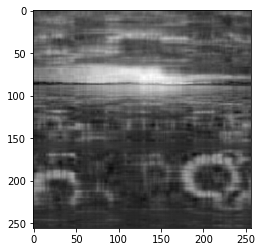

In [46]:
plt.imshow(reconstruction,cmap='gray')

### First 25 Columns

In [47]:
r = 25
reconstruction = U[:,:r] @ S[0:r,:r] @ V[:r,:]

In [48]:
energy = 0
for i in range(r):
    energy = energy + S[i][i]*S[i][i]
energy = energy / np.sum(np.square(S))
print('The first ' + str(r) + ' columns contained ' + str(energy * 100) + '% of the original energy of the image')

The first 25 columns contained 97.85758550989547% of the original energy of the image


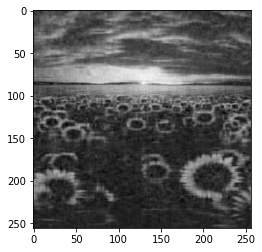

In [49]:
plt.imshow(reconstruction,cmap='gray')

### First 50 columns

In [50]:
r = 50
reconstruction = U[:,:r] @ S[0:r,:r] @ V[:r,:]

In [51]:
energy = 0
for i in range(r):
    energy = energy + S[i][i]*S[i][i]
energy = energy / np.sum(np.square(S))
print('The first ' + str(r) + ' columns contained ' + str(energy * 100) + '% of the original energy of the image')

The first 50 columns contained 99.21561160885688% of the original energy of the image


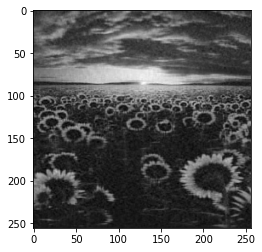

In [52]:
plt.imshow(reconstruction,cmap='gray')

### SVD for Image Recovery
    Matrix Completion is a process of filling in the missing entries in a partially observed matrix. The Netflix example is common for this. 

    Given a ratings-matrix in which each entry represents the rating of movie by the customer, if the customer has watched the movie, and is missing otherwise. We would like to predict the remaining entries in order to make good recommendations to customers on what to watch next.

    The basic fact that helps to solve this problem is that most users have a pattern in the movies they wattch and in the ratings they give to these movies. So, the ratings-matrix has little unique information. This means that a low-rank matrix would be able to provide a good enough approximationfor the matrix.

    We can also achieve similar in Images. Since an image is contigous, the values of most pixels depend on the pixels around them. So a low-rank matrix can be a goof approximation of the images.

### SVD for Eigenfaces
    The original paper "Eigenfaces for Recoginition" came out in 1991. Before this most of the approaches for facial recoginiton dealt with identifying individual features such as the eyes, or the nose and developing a face model by the position.
    
    The Eigenfaces approach sought to extract the relevant information in a face image, encode it as efficiently as possible and compare one face encoding with a database of models encoded similarly.

In [53]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

#### labelled Dattaset with faces dataset 

In [54]:
from sklearn.datasets import fetch_lfw_people

In [55]:
#load the data
lfw_dataset = fetch_lfw_people(min_faces_per_person=100)

c:\Users\Monit Sharma\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\datasets\_lfw.py:332: UserWarning: Persisting input arguments took 2.09s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  slice_=slice_,


In [56]:
_,h, w = lfw_dataset.images.shape
X = lfw_dataset.data
y = lfw_dataset.target
target_names = lfw_dataset.target_names
print(target_names)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']


##### Observe Count for each class

In [57]:
pd.Series(y).value_counts()

2    530
0    236
4    144
1    121
3    109
dtype: int64

#### Splitting the Training and Test data

In [58]:
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 2, stratify = y)


#### Function for Visualization

In [59]:
# Visualization
def plot_gallery(images, titles, h, w, rows=3, cols=4):
    plt.figure(figsize = (14, 6))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())
        plt.subplots_adjust(hspace = 1.0, wspace = 1.0)

def titles(y_pred, y_test, target_names):
    for i in range(y_pred.shape[0]):
        pred_name = target_names[y_pred[i]].split(' ')[-1]
        true_name = target_names[y_test[i]].split(' ')[-1]
        yield 'predicted: {0}\ntrue: {1}'.format(pred_name, true_name)

#### Finding Eigenfaces using SVD

In [60]:
U, S, VT = np.linalg.svd(X_train, full_matrices=False)

In [61]:
print(U.shape, S.shape, VT.shape)

(798, 798) (798,) (798, 2914)


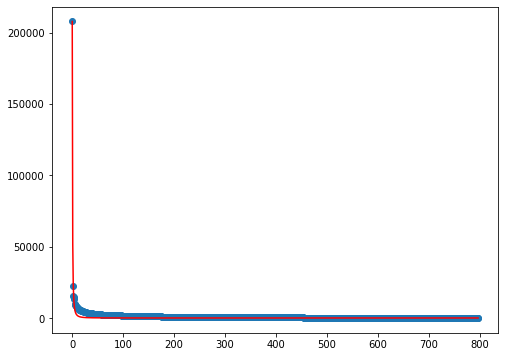

In [62]:
## Observe how quickly singular value dimninsh

idx = range(len(S))
func = [S[0]/ ((i+1)**2) for i in idx]

plt.figure(figsize = (8,6))
plt.plot(idx, func,color = 'r')
plt.scatter(idx,S)


### Plot all the Eigen Faces

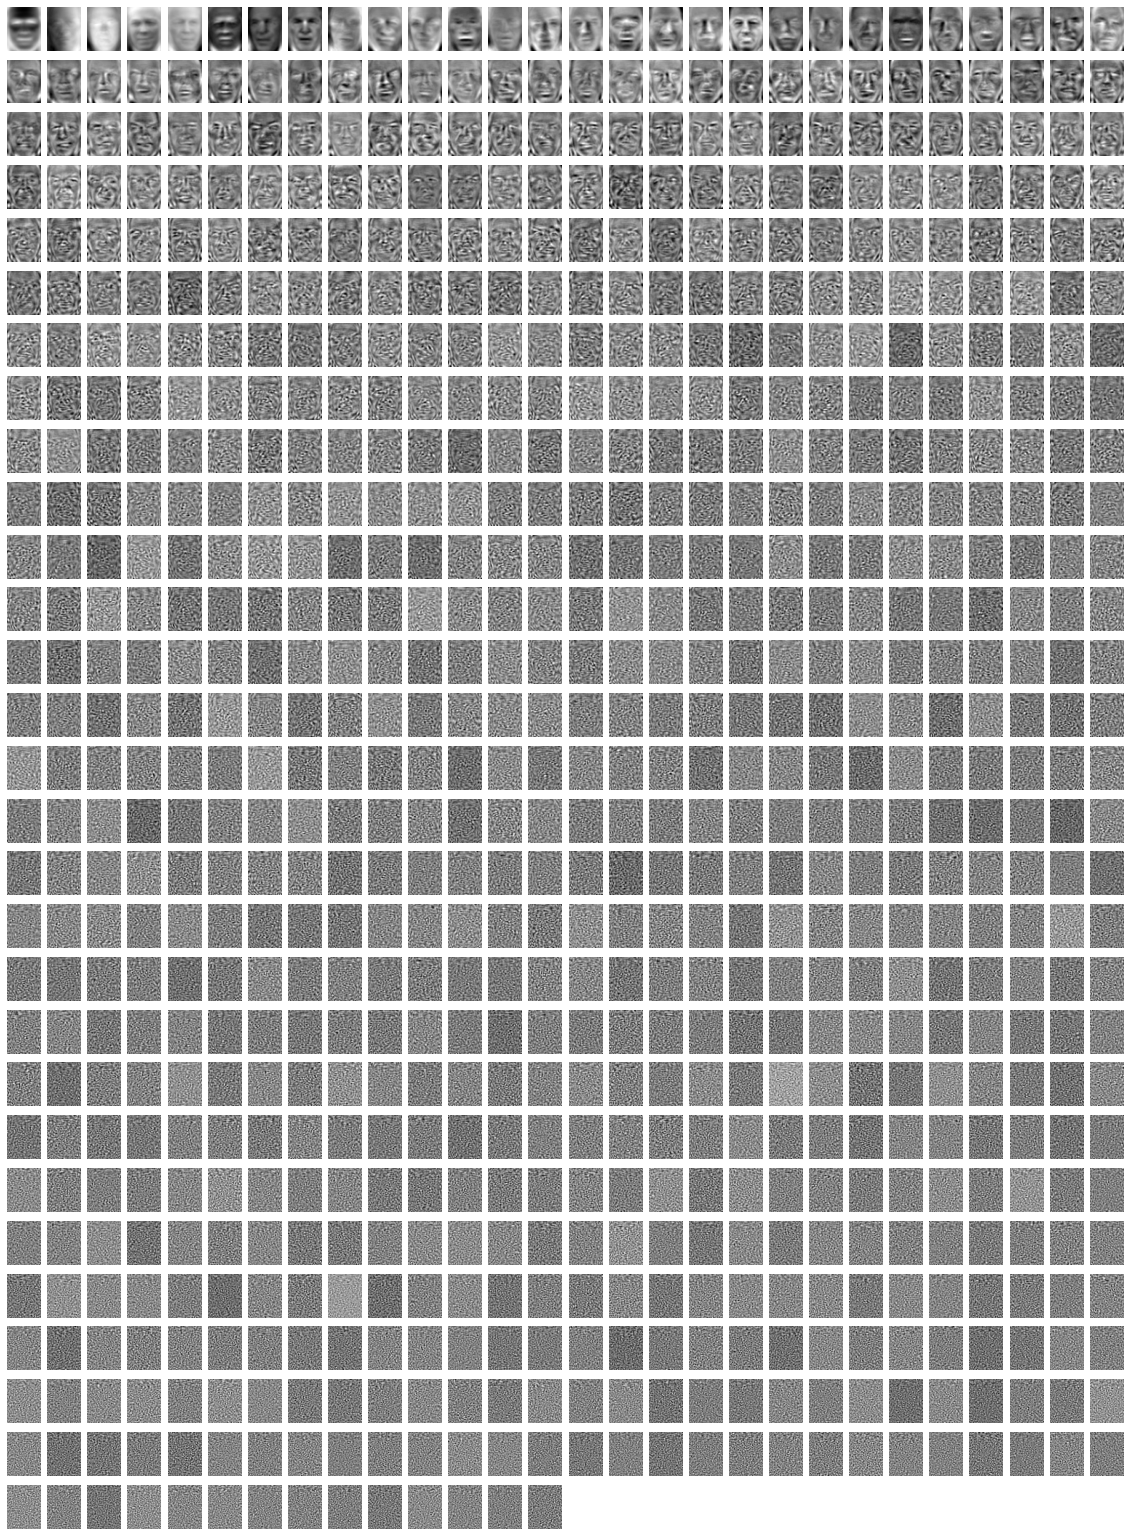

In [63]:
plt.figure(figsize = (20, 28))
for i in range(len(S)):
  plt.subplot(29, 28, i+1), plt.axis('off'), plt.imshow(VT[i].reshape(h, w), cmap = plt.cm.gray)



In [64]:
num_components = 120

# transform both train and test data into new face space
X_train_transformed = X_train @ VT[:num_components,:].T
X_test_transformed = X_test @ VT[:num_components,:].T

In [65]:
print(X_train.shape, X_train_transformed.shape)

(798, 2914) (798, 120)


        We have transformed from a 2914 dimensional space to a 120 dimensional space

(<AxesSubplot:title={'center':'Image in new face space'}>,
 Text(0.5, 1.0, 'Image in new face space'))

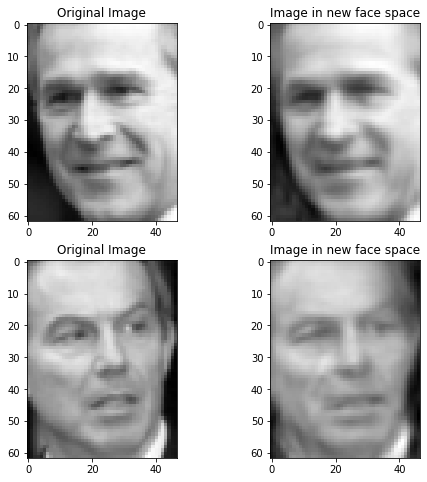

In [66]:
# visualize images after encoding as linear combination of eigenfaces
reconst0 = X_train_transformed[0] @ VT[: num_components, :]
reconst1 = X_train_transformed[1] @ VT[: num_components, :]

plt.figure(figsize = (8, 8))
plt.subplot(2, 2, 1), plt.imshow(X_train[0].reshape(h, w), cmap = plt.cm.gray), plt.title('Original Image')
plt.subplot(2, 2, 2), plt.imshow(reconst0.reshape(h, w), cmap = plt.cm.gray), plt.title('Image in new face space')
plt.subplot(2, 2, 3), plt.imshow(X_train[1].reshape(h, w), cmap = plt.cm.gray), plt.title('Original Image')
plt.subplot(2, 2, 4), plt.imshow(reconst1.reshape(h, w), cmap = plt.cm.gray), plt.title('Image in new face space')


### Classification using kNN

In [67]:
clfkNN = KNeighborsClassifier()
clfkNN.fit(X_train_transformed, y_train)

KNeighborsClassifier()

In [68]:
y_predkNN = clfkNN.predict(X_test_transformed)
print(classification_report(y_test, y_predkNN, target_names=target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.57      0.85      0.68        71
  Donald Rumsfeld       0.50      0.42      0.45        36
    George W Bush       0.71      0.80      0.75       159
Gerhard Schroeder       0.50      0.15      0.23        33
       Tony Blair       0.58      0.26      0.35        43

         accuracy                           0.64       342
        macro avg       0.57      0.49      0.50       342
     weighted avg       0.62      0.64      0.61       342



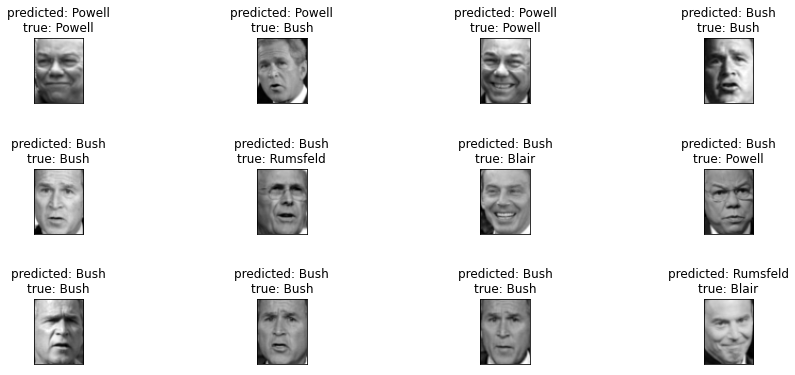

In [69]:
# observe some of the images with their predicted and true labels
prediction_titles = list(titles(y_predkNN, y_test, target_names))
plot_gallery(X_test, prediction_titles, h, w)

### Classification using Multi Layer Perceptron

In [70]:
# neural network
clf = MLPClassifier(hidden_layer_sizes=(1024,), batch_size=256, verbose=True, early_stopping=True).fit(X_train_transformed, y_train)


Iteration 1, loss = 13.65377637
Validation score: 0.537500
Iteration 2, loss = 7.96854788
Validation score: 0.525000
Iteration 3, loss = 6.37800806
Validation score: 0.562500
Iteration 4, loss = 6.91573458
Validation score: 0.537500
Iteration 5, loss = 3.67933606
Validation score: 0.750000
Iteration 6, loss = 3.27298479
Validation score: 0.812500
Iteration 7, loss = 2.57868015
Validation score: 0.825000
Iteration 8, loss = 1.62305229
Validation score: 0.787500
Iteration 9, loss = 1.26320593
Validation score: 0.825000
Iteration 10, loss = 1.24609117
Validation score: 0.850000
Iteration 11, loss = 0.70829609
Validation score: 0.875000
Iteration 12, loss = 0.74991394
Validation score: 0.875000
Iteration 13, loss = 0.63582568
Validation score: 0.900000
Iteration 14, loss = 0.38742998
Validation score: 0.900000
Iteration 15, loss = 0.25022281
Validation score: 0.887500
Iteration 16, loss = 0.25736276
Validation score: 0.900000
Iteration 17, loss = 0.17954144
Validation score: 0.900000
Itera

In [71]:
y_pred = clf.predict(X_test_transformed)
print(classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.95      0.80      0.87        71
  Donald Rumsfeld       0.96      0.64      0.77        36
    George W Bush       0.87      0.91      0.89       159
Gerhard Schroeder       0.89      0.73      0.80        33
       Tony Blair       0.51      0.77      0.61        43

         accuracy                           0.82       342
        macro avg       0.83      0.77      0.79       342
     weighted avg       0.85      0.82      0.83       342



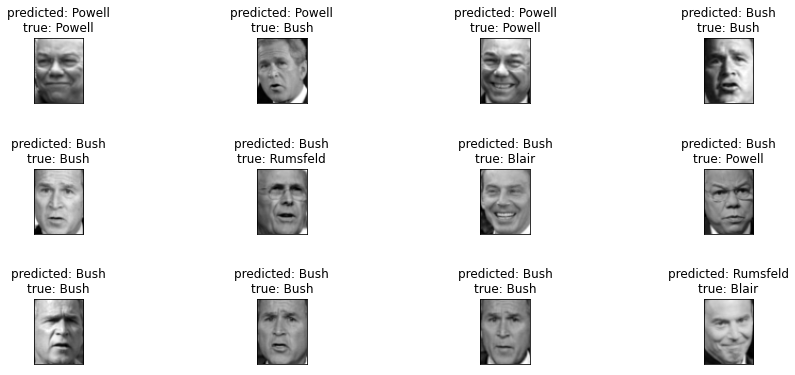

In [72]:
# observe some of the images with their predicted and true labels
prediction_titles = list(titles(y_predkNN, y_test, target_names))
plot_gallery(X_test, prediction_titles, h, w)

### Balance the data using SMOTE
        SMOTE generates syntehtic data
        

<AxesSubplot:>

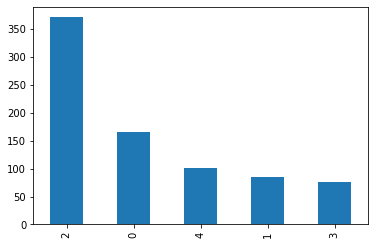

In [73]:
# observe imbalance in original data
pd.Series(y_train).value_counts().plot.bar()

In [77]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)

In [80]:
X_train_new, y_train_new = sm.fit_resample(X_train, y_train.ravel())

<AxesSubplot:>

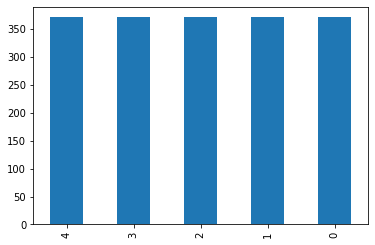

In [82]:
# observe that data has been balanced
pd.Series(y_train_new).value_counts().plot.bar()

In [83]:
# convert to dataframe to make it easy to separate synthetic data from original
X_train_newDF = pd.DataFrame(X_train_new)
X_trainDF = pd.DataFrame(X_train)

In [84]:
# collect synthetic data
synth = X_train_newDF[~X_train_newDF.isin(X_trainDF)].dropna()

In [85]:
synth.shape

(1057, 2914)

In [86]:
synth = np.array(synth)

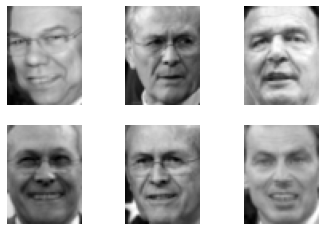

In [87]:
# plot synthetic photos
np.random.seed(4)
idx = np.random.choice(len(synth), size = 6)
for i in range(6):
  plt.subplot(2, 3, i+1), plt.imshow(synth[idx[i]].reshape(h, w), cmap = 'gray'), plt.axis('off')


#### SVD on new balanced data

In [88]:
U, S, VT = np.linalg.svd(X_train_new, full_matrices=False) 

In [89]:
print(U.shape, S.shape, VT.shape)

(1855, 1855) (1855,) (1855, 2914)


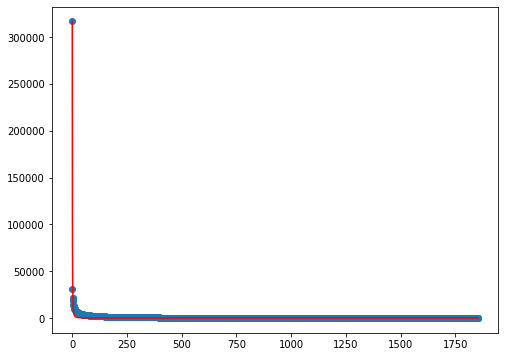

In [90]:
# observe how quickly singular values diminish - approximately as fast as sigma0/(i+1)^2
idx = range(len(S))
func = [S[0]/((i+1) ** 2) for i in idx ]

plt.figure(figsize = (8, 6))
plt.plot(idx, func, color = 'r')
plt.scatter(idx, S)

### Start by exploring cumulaitive variance explained by the Singular Vecors

Text(0.5, 1.0, 'Explained Variance')

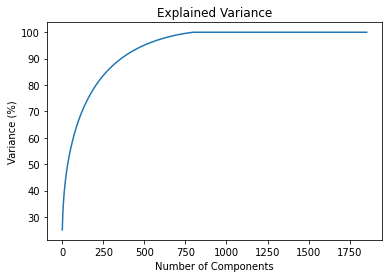

In [91]:
sum_singular_vals = np.sum(S)
variance_ratio = S / sum_singular_vals

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(variance_ratio) * 100)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')

        At around 750 components, all of the variance is preserved. So, let's preserve 750 components

In [92]:
num_components = 750

In [93]:
# transform both train and test data into new face space
X_train_transformed = X_train_new @ VT[:num_components,:].T
X_test_transformed = X_test @ VT[:num_components,:].T

In [94]:
print(X_train.shape, X_train_transformed.shape)

(798, 2914) (1855, 750)


(<AxesSubplot:title={'center':'Image in new face space'}>,
 Text(0.5, 1.0, 'Image in new face space'))

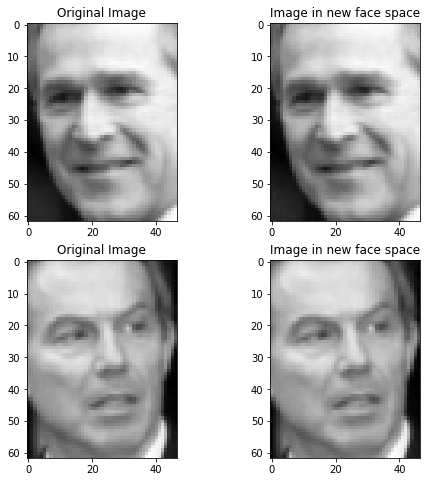

In [95]:
# visualize images after encoding as linear combination of eigenfaces
reconst0 = X_train_transformed[0] @ VT[: num_components, :]
reconst1 = X_train_transformed[1] @ VT[: num_components, :]

plt.figure(figsize = (8, 8))
plt.subplot(2, 2, 1), plt.imshow(X_train[0].reshape(h, w), cmap = plt.cm.gray), plt.title('Original Image')
plt.subplot(2, 2, 2), plt.imshow(reconst0.reshape(h, w), cmap = plt.cm.gray), plt.title('Image in new face space')
plt.subplot(2, 2, 3), plt.imshow(X_train[1].reshape(h, w), cmap = plt.cm.gray), plt.title('Original Image')
plt.subplot(2, 2, 4), plt.imshow(reconst1.reshape(h, w), cmap = plt.cm.gray), plt.title('Image in new face space')


## kNN

In [96]:
clfkNN = KNeighborsClassifier()
clfkNN.fit(X_train_transformed, y_train_new)

KNeighborsClassifier()

In [97]:
y_predkNN = clfkNN.predict(X_test_transformed)
print(classification_report(y_test, y_predkNN, target_names=target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.59      0.75      0.66        71
  Donald Rumsfeld       0.38      0.64      0.48        36
    George W Bush       0.97      0.36      0.53       159
Gerhard Schroeder       0.33      0.64      0.43        33
       Tony Blair       0.38      0.60      0.47        43

         accuracy                           0.53       342
        macro avg       0.53      0.60      0.51       342
     weighted avg       0.69      0.53      0.53       342



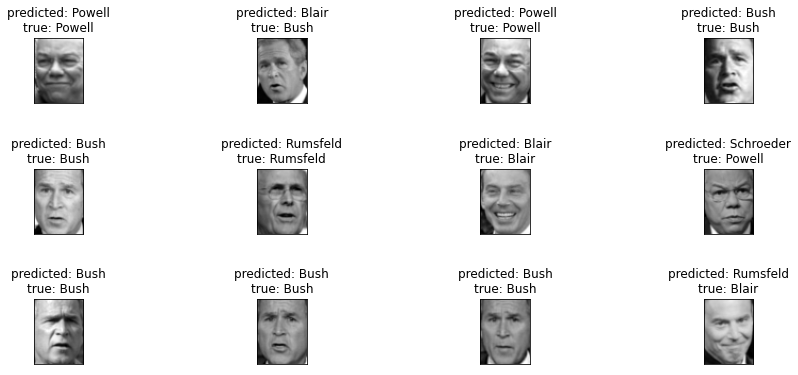

In [98]:
# observe some of the images with their predicted and true labels
prediction_titles = list(titles(y_predkNN, y_test, target_names))
plot_gallery(X_test, prediction_titles, h, w)

### Multi Layer Perceptron

In [99]:
# neural network
clf = MLPClassifier(hidden_layer_sizes=(1024,), batch_size=256, verbose=True, early_stopping=True, random_state = 42).fit(X_train_transformed, y_train_new)


Iteration 1, loss = 11.03557732
Validation score: 0.370968
Iteration 2, loss = 4.98713538
Validation score: 0.672043
Iteration 3, loss = 2.40578938
Validation score: 0.946237
Iteration 4, loss = 0.45511857
Validation score: 0.956989
Iteration 5, loss = 0.39694728
Validation score: 0.967742
Iteration 6, loss = 0.06027169
Validation score: 0.983871
Iteration 7, loss = 0.02546779
Validation score: 0.989247
Iteration 8, loss = 0.00017413
Validation score: 0.989247
Iteration 9, loss = 0.00017233
Validation score: 0.989247
Iteration 10, loss = 0.00017112
Validation score: 0.989247
Iteration 11, loss = 0.00017200
Validation score: 0.989247
Iteration 12, loss = 0.00016645
Validation score: 0.989247
Iteration 13, loss = 0.00016429
Validation score: 0.989247
Iteration 14, loss = 0.00016296
Validation score: 0.989247
Iteration 15, loss = 0.00016144
Validation score: 0.989247
Iteration 16, loss = 0.00015996
Validation score: 0.989247
Iteration 17, loss = 0.00015844
Validation score: 0.989247
Itera

In [100]:
y_pred = clf.predict(X_test_transformed)
print(classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.87      0.77      0.82        71
  Donald Rumsfeld       0.72      0.86      0.78        36
    George W Bush       0.86      0.92      0.89       159
Gerhard Schroeder       0.84      0.64      0.72        33
       Tony Blair       0.71      0.70      0.71        43

         accuracy                           0.83       342
        macro avg       0.80      0.78      0.79       342
     weighted avg       0.83      0.83      0.83       342



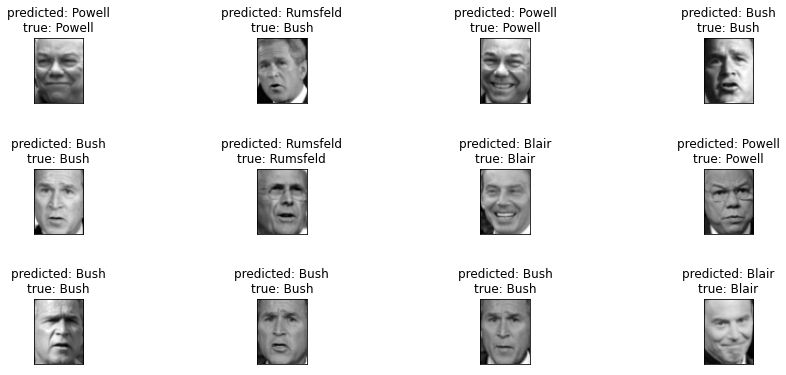

In [101]:
# observe some of the images with their predicted and true labels
prediction_titles = list(titles(y_pred, y_test, target_names))
plot_gallery(X_test, prediction_titles, h, w)

### SVD for Spectral Clustering
        Clustering is the task of grouping similar objects together. It is an unsupervised machine learning technique. For most of us, clustering is synonymous with K-Means Clustering – a simple but powerful algorithm. However, it is not always the most accurate.

        Spectral clustering is a technique that combats this. It has roots in Graph theory. These are the basic steps:

        1. Start with the Affinity matrix (A) or the Adjacency matrix of the data. This represents how similar one object is to another. In a graph, this would represent if an edge existed between the points or not
        2. Find the Degree matrix (D) of each object. This is a diagonal matrix with entry (i,i) equal to the number of objects object i is similar to
        3. Find the Laplacian (L) of the Affinity Matrix: L = A – D
        4. Find the highest k eigenvectors of the Laplacian Matrix depending on their eigenvalues
        5. Run k-means on these eigenvectors to cluster the objects into k classes

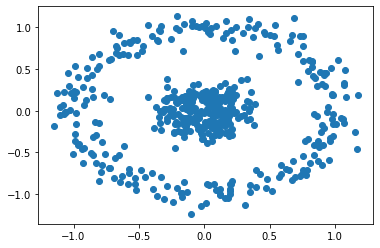

c:\Users\Monit Sharma\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\manifold\_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


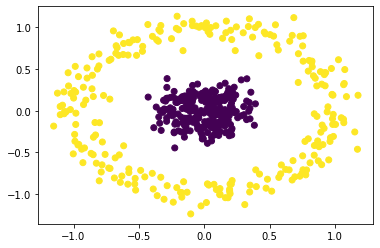

In [102]:
# import required functions and libraries
from sklearn.datasets import make_circles
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import SpectralClustering
import numpy as np
import matplotlib.pyplot as plt

# generate your data
X, labels = make_circles(n_samples=500, noise=0.1, factor=.2)

# plot your data
plt.scatter(X[:, 0], X[:, 1])
plt.show()

# train and predict
s_cluster = SpectralClustering(n_clusters = 2, eigen_solver='arpack',
        affinity="nearest_neighbors").fit_predict(X)
        
# plot clustered data
plt.scatter(X[:, 0], X[:, 1], c = s_cluster)
plt.show()

###  SVD for Removing Bacground from Videos
        Think of how you would distinguish the background of a video from its foreground. The background of a video is essentially static – it does not see a lot of movement. All the movement is seen in the foreground. This is the property that we exploit to separate the background from the foreground.

        Here are the steps we can follow for implementing this approach:

        1. Create matrix M from video – This is done by sampling image snapshots from the video at regular intervals, flattening these image matrices to arrays, and storing them as the columns of matrix M
        2. We can, therefore, think of M as being the sum of two matrices – one representing the background and other the foreground
        3. The background matrix does not see a variation in pixels and is thus redundant i.e. it does not have a lot of unique information. So, it is a low-rank matrix
        4. So, a low-rank approximation of M is the background matrix. We use SVD in this step
        5. We can obtain the foreground matrix by simply subtracting the background matrix from the matrix M

## What is Singular Value Decomposition?

### Rank of a Matrix
    The  rank of a matrix is the maximum number of linearly independent row vectors in hthe matri. A vector r is said to be linealrly indeendent of vectors r1 and r2 if it cannot be expressed as a linear combination of r1 and r2

## Singular value decomposition (SVD)
    SVD deasls with decomposing a matrix innto a product of 3 matrices     
$$ A = U S V^T$$

If  the dimensions of $A$ are $ m \times n$
1. $U$ is an $m\times m$ matrix of left singular vectors.
2. $S$ is an $m \times n$ rectangular diagnol matrix of Singular Values arranged in decreasing order.
3. $V$ is an $n \times n$ matrix of Right Singular Vectors

        The decomposition allows us to express our original matrix as a linear combination of low-rank matrices.

        In a practical application, you will observe that only the first few, say k, singular values are large. The rest of the singular values approach zero. As a result, terms except the first few can be ignored without losing much of the information. 

    1. Using SVD, we are able to represent our large matrix A by 3 smaller matrices U, S and V
    2. This is helpful in large computations
    3.We can obtain a k-rank approximation of A. To do this, select the first k singular values and truncate the 3 matrices accordingly   

### SVD in NumPy
        You can obtain the complete matrices U, S, and V using SVD in numpy.linalg. Note that S is a diagonal matrix which means that most of its entries are zeros. This is called a sparse matrix. To save space, S is returned as a 1D array of singular values instead of the complete 2D matrix.


In [103]:
import numpy as np
from numpy.linalg import svd

# define your matrix as a 2D numpy array
A = np.array([[4, 0], [3, -5]])

U, S, VT = svd(A)

print("Left Singular Vectors:")
print(U)
print("Singular Values:") 
print(np.diag(S))
print("Right Singular Vectors:") 
print(VT)

# check that this is an exact decomposition
# @ is used for matrix multiplication in Py3, use np.matmul with Py2
print(U @ np.diag(S) @ VT)

Left Singular Vectors:
[[-0.4472136  -0.89442719]
 [-0.89442719  0.4472136 ]]
Singular Values:
[[6.32455532 0.        ]
 [0.         3.16227766]]
Right Singular Vectors:
[[-0.70710678  0.70710678]
 [-0.70710678 -0.70710678]]
[[ 4.00000000e+00 -1.11271234e-15]
 [ 3.00000000e+00 -5.00000000e+00]]


### Truncated SVD in scikit-learn
    We are ultimately going to trim our matrices, so why find the complete matrices in the first place?

    In such cases, it is better to use TruncatedSVD from sklearn.decomposition. You specify the number of features you want in the output as the n_components parameter. n_components should be strictly less than the number of features in the input matrix:

In [104]:
import numpy as np
from sklearn.decomposition import TruncatedSVD

A = np.array([[-1, 2, 0], [2, 0, -2], [0, -2, 1]])
print("Original Matrix:")
print(A)

svd =  TruncatedSVD(n_components = 2)
A_transf = svd.fit_transform(A)

print("Singular values:")
print(svd.singular_values_)

print("Transformed Matrix after reducing to 2 features:")
print(A_transf)

Original Matrix:
[[-1  2  0]
 [ 2  0 -2]
 [ 0 -2  1]]
Singular values:
[3. 3.]
Transformed Matrix after reducing to 2 features:
[[-1.78885438e+00 -1.34164079e+00]
 [-8.94427191e-01  2.68328157e+00]
 [ 2.23606798e+00  1.11022302e-16]]


### Randomized SVD in scikit-learn
        Randomized SVD gives the same results as Truncated SVD and has a faster computation time. While Truncated SVD uses an exact solver ARPACK, Randomized SVD uses approximation techniques.



In [105]:
import numpy as np
from sklearn.utils.extmath import randomized_svd

A = np.array([[-1, 2, 0], [2, 0, -2], [0, -2, 1]])
u, s, vt = randomized_svd(A, n_components = 2)

print("Left Singular Vectors:")
print(u)

print("Singular Values:") 
print(np.diag(s))

print("Right Singular Vectors:") 
print(vt)

c:\Users\Monit Sharma\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\extmath.py:376: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  FutureWarning,


Left Singular Vectors:
[[-0.25523068 -0.70029483]
 [ 0.94244607 -0.02615889]
 [-0.21599235  0.71337428]]
Singular Values:
[[3. 0.]
 [0. 3.]]
Right Singular Vectors:
[[ 0.71337428 -0.02615889 -0.70029483]
 [ 0.21599235 -0.94244607  0.25523068]]
